# **Data Preprocessing**
- data cleaning before being used to build models
- drop attributes, fill in missing values, identify and remove outliers, encoding categorical variables, normalization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('loan_sanction.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


## Drop un-important attributes

In [3]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [4]:
#Attributes left - Gender, Married, Dependenets, education, applicant income, coapplicant income, loan term, credit history, property area
df = df.drop(['Loan_ID', 'Self_Employed', 'ApplicantIncome'], axis=1)

## Fill in missing values

In [5]:
print(df.isnull().sum())
print(df.shape)

Gender               13
Married               3
Dependents           15
Education             0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 10)


In [6]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

columns = ["Gender", "Married", "Dependents", "Loan_Amount_Term", "Credit_History"]
for i in columns:
    df[i] = df[i].fillna(df[i].mode()[0])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    object 
 9   Loan_Status        614 non-null    object 
dtypes: float64(4), object(6)
memory usage: 48.1+ KB
None


## Identify outliers and remove them

In [7]:
# compute the correlation coefficients between the columns in 'df'
corr = df.corr()

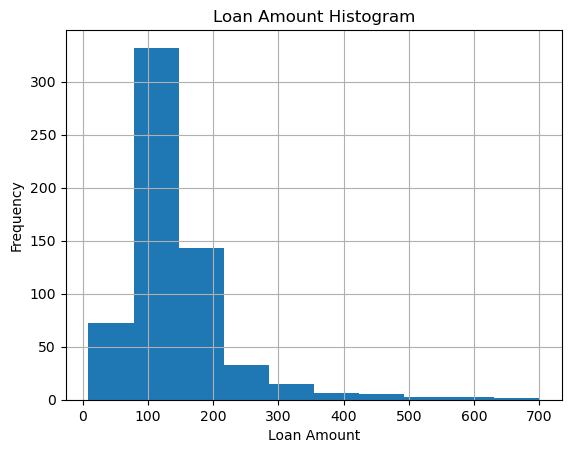

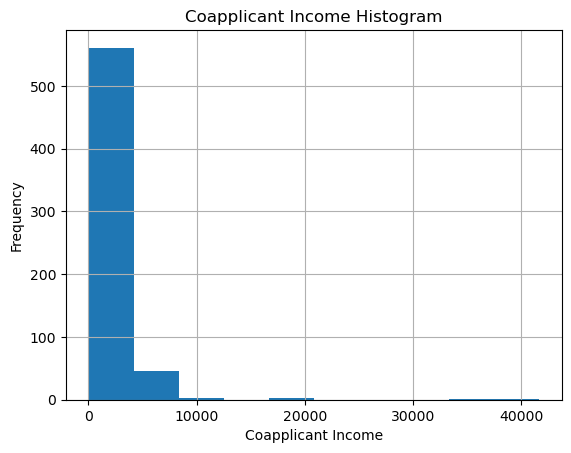

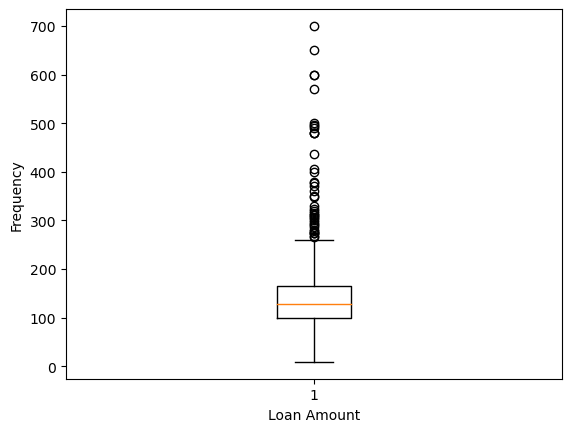

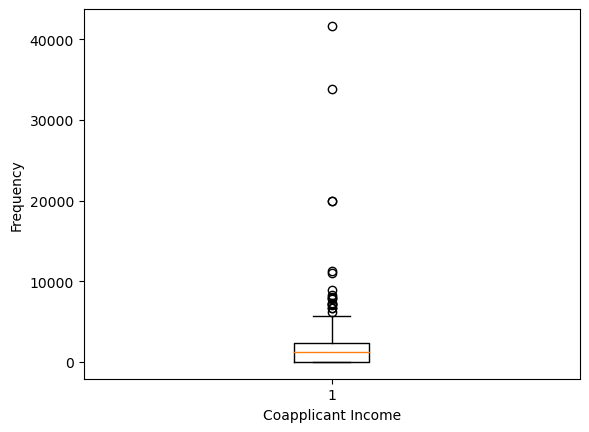

In [8]:
def plot_hist(df_col, label):
    hist_ApplicantIncome = df_col.hist(bins=10)
    hist_ApplicantIncome.set_title(label + ' Histogram')
    hist_ApplicantIncome.set_xlabel(label)
    hist_ApplicantIncome.set_ylabel('Frequency')
    plt.show()

plot_hist(df['LoanAmount'], 'Loan Amount')
plot_hist(df['CoapplicantIncome'], 'Coapplicant Income')

plt.boxplot(df["LoanAmount"])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(df['CoapplicantIncome'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()


c:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == "__main__":


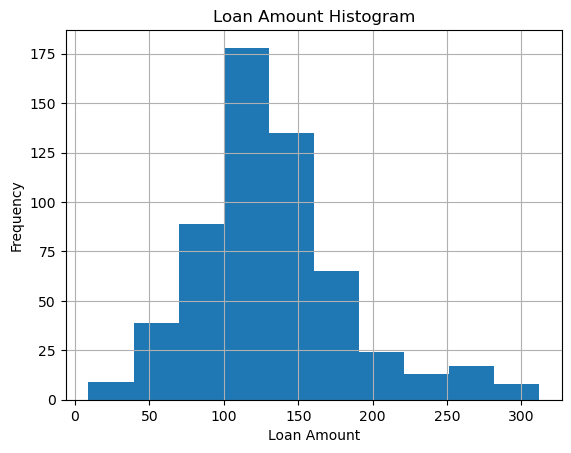

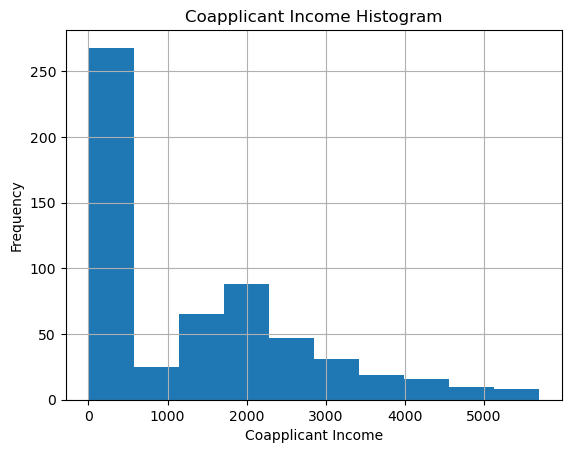

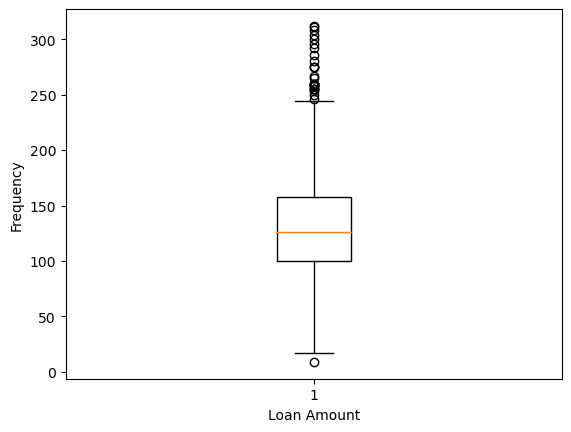

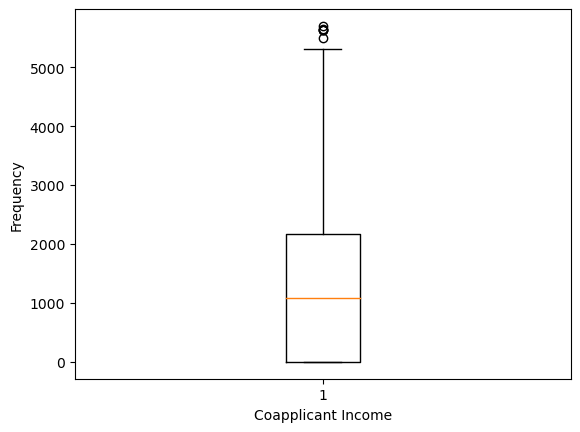

In [9]:
#Remove outliers in applicant income & coapplicant income
def remove_outliers(col,df=df):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 2 * std
    t_low = mean - threshold
    t_high = mean + threshold
    df = df.drop(df[col > t_high].index)
    df = df.drop(df[col < t_low].index)
    return df

#1st iteration
df = remove_outliers(df['LoanAmount'], df)
df = remove_outliers(df['CoapplicantIncome'], df)

plot_hist(df['LoanAmount'], 'Loan Amount')
plot_hist(df['CoapplicantIncome'], 'Coapplicant Income')

plt.boxplot(df["LoanAmount"])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(df['CoapplicantIncome'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

c:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == "__main__":


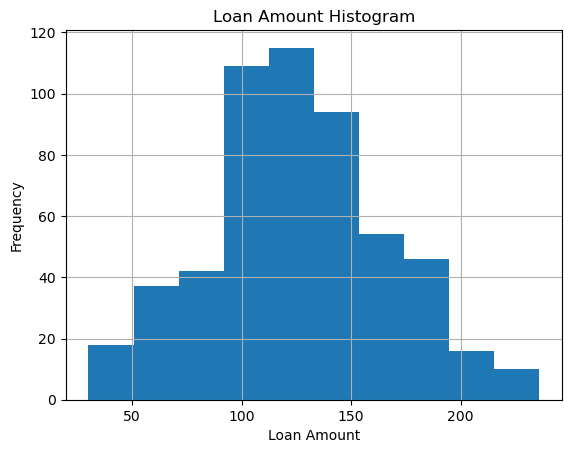

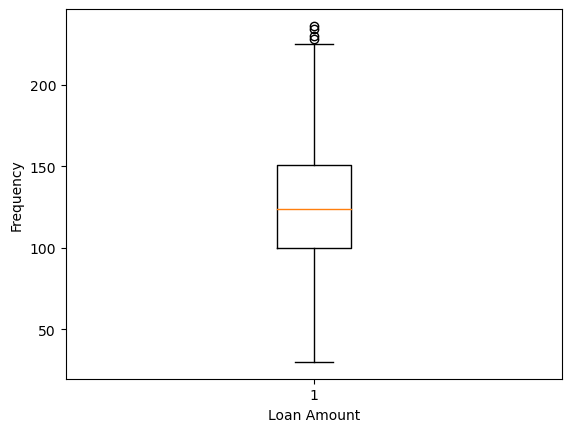

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             541 non-null    object 
 1   Married            541 non-null    object 
 2   Dependents         541 non-null    object 
 3   Education          541 non-null    object 
 4   CoapplicantIncome  541 non-null    float64
 5   LoanAmount         541 non-null    float64
 6   Loan_Amount_Term   541 non-null    float64
 7   Credit_History     541 non-null    float64
 8   Property_Area      541 non-null    object 
 9   Loan_Status        541 non-null    object 
dtypes: float64(4), object(6)
memory usage: 46.5+ KB
None


In [10]:
#2nd iteration
df = remove_outliers(df['LoanAmount'], df)

plot_hist(df['LoanAmount'], 'Loan Amount')

plt.boxplot(df["LoanAmount"])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

print(df.info())

## Encoding Categroical Variables

In [11]:
#Seperate data into X and Y
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']
X["Credit_History"] = X['Credit_History'].astype('category')
print(X.head)

<bound method NDFrame.head of      Gender Married Dependents     Education  CoapplicantIncome  LoanAmount  \
0      Male      No          0      Graduate                0.0  146.412162   
1      Male     Yes          1      Graduate             1508.0  128.000000   
2      Male     Yes          0      Graduate                0.0   66.000000   
3      Male     Yes          0  Not Graduate             2358.0  120.000000   
4      Male      No          0      Graduate                0.0  141.000000   
..      ...     ...        ...           ...                ...         ...   
608    Male     Yes          0      Graduate             1950.0  108.000000   
609  Female      No          0      Graduate                0.0   71.000000   
610    Male     Yes         3+      Graduate                0.0   40.000000   
612    Male     Yes          2      Graduate                0.0  187.000000   
613  Female      No          0      Graduate                0.0  133.000000   

     Loan_Amount_Term

In [12]:
cat_cols = X.select_dtypes(include = ['category', 'object']).columns
cat_cols = cat_cols.astype(str)
print(cat_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Credit_History',
       'Property_Area'],
      dtype='object')


In [13]:
X = pd.get_dummies(X, columns=cat_cols)
print(X.head)

<bound method NDFrame.head of      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Gender_Female  \
0                  0.0  146.412162             360.0              0   
1               1508.0  128.000000             360.0              0   
2                  0.0   66.000000             360.0              0   
3               2358.0  120.000000             360.0              0   
4                  0.0  141.000000             360.0              0   
..                 ...         ...               ...            ...   
608             1950.0  108.000000             360.0              0   
609                0.0   71.000000             360.0              1   
610                0.0   40.000000             180.0              0   
612                0.0  187.000000             360.0              0   
613                0.0  133.000000             360.0              1   

     Gender_Male  Married_No  Married_Yes  Dependents_0  Dependents_1  \
0              1           1            0   

## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
scale_var = ['LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']
X[scale_var] = sc_X.fit_transform(X[scale_var])
X[scale_var] = X[scale_var].round(4)
print(X.head)


<bound method NDFrame.head of      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Gender_Female  \
0               0.0000      0.5651            0.7436              0   
1               0.2645      0.4757            0.7436              0   
2               0.0000      0.1748            0.7436              0   
3               0.4136      0.4369            0.7436              0   
4               0.0000      0.5388            0.7436              0   
..                 ...         ...               ...            ...   
608             0.3420      0.3786            0.7436              0   
609             0.0000      0.1990            0.7436              1   
610             0.0000      0.0485            0.3590              0   
612             0.0000      0.7621            0.7436              0   
613             0.0000      0.5000            0.7436              1   

     Gender_Male  Married_No  Married_Yes  Dependents_0  Dependents_1  \
0              1           1            0   

In [15]:
#Store X and y, to be used in other notebooks
%store X
%store y

Stored 'X' (DataFrame)
Stored 'y' (Series)
